# Run FindAllMarkers on NK-data

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
seu_HQC <- readRDS(file = "../../data/seurat_object/NK-data/seu_HQC_subclusterd2_NK.obj")
seu_HQC

An object of class Seurat 
24124 features across 1476 samples within 2 assays 
Active assay: SCT (10003 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, reumap

In [3]:
levels <- read.table(file="./manual_ID_levels_color_NK.txt")
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "ectoderm_head_croc"      "ectoderm_head_Optix"    
[3] "ectoderm_head_oc_eya"    "ectoderm_head_oc_so"    
[5] "ectoderm_head_oc_CenG1A" "ectoderm_head_kn"

[1] 28

[1] "lightsteelblue1" "lightsteelblue3" "lightskyblue1"   "lightskyblue2"  
[5] "lightskyblue3"   "skyblue3"

In [16]:
annot_df <- read.csv('./annot_df.csv')
annot_df

cluster_id,cluster_name
<int>,<chr>
1,ectoderm_head_croc
2,ectoderm_head_Optix
3,ectoderm_head_oc_CenG1A
4,ectoderm_head_oc_eya
5,ectoderm_head_oc_so
6,ectoderm_head_kn
7,amnioserosa_anterior
8,amnioserosa_trunk
9,ectoderm_medial_DE_trunk


In [5]:
Idents(seu_HQC) <- 'manual_ID'
levels(seu_HQC) <- levels
all.markers <- FindAllMarkers(seu_HQC, method = 'MAST')
head(all.markers)

Calculating cluster ectoderm_head_croc

Calculating cluster ectoderm_head_Optix

Calculating cluster ectoderm_head_oc_eya

Calculating cluster ectoderm_head_oc_so

Calculating cluster ectoderm_head_oc_CenG1A

Calculating cluster ectoderm_head_kn

Calculating cluster ectoderm_medial_DE_trunk

Calculating cluster ectoderm_intermediate_DE_trunk

Calculating cluster ectoderm_lateral_DE_trunk

Calculating cluster ectoderm_lateral_NE_trunk

Calculating cluster ectoderm_intermediate_NE_trunk

Calculating cluster ectoderm_medial_NE_trunk

Calculating cluster midline_cells

Calculating cluster ectoderm_PS14

Calculating cluster amnioserosa_anterior

Calculating cluster amnioserosa_trunk

Calculating cluster ectoderm_hindgut

Calculating cluster endoderm_antMG_wg

Calculating cluster endoderm_antMG_wntD

Calculating cluster endoderm_postMG_dorsal

Calculating cluster endoderm_postMG_ventral

Calculating cluster mesoderm_gcm

Calculating cluster mesoderm_PS1-3

Calculating cluster mesoderm_PS4-6


,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Optix,5.593991e-86,1.8185681,0.938,0.053,5.595669e-82,ectoderm_head_croc,Optix
fd102C,1.444735e-83,1.8839667,0.938,0.058,1.445169e-79,ectoderm_head_croc,fd102C
croc,7.281647e-57,1.7312033,0.688,0.044,7.283832e-53,ectoderm_head_croc,croc
ab,1.769985e-56,1.3276675,0.812,0.066,1.770516e-52,ectoderm_head_croc,ab
p38c,3.206398e-51,0.4738683,0.500,0.022,3.207360e-47,ectoderm_head_croc,p38c
CG10553,4.962652e-47,0.4298032,0.375,0.012,4.964141e-43,ectoderm_head_croc,CG10553


In [6]:
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 280

NULL

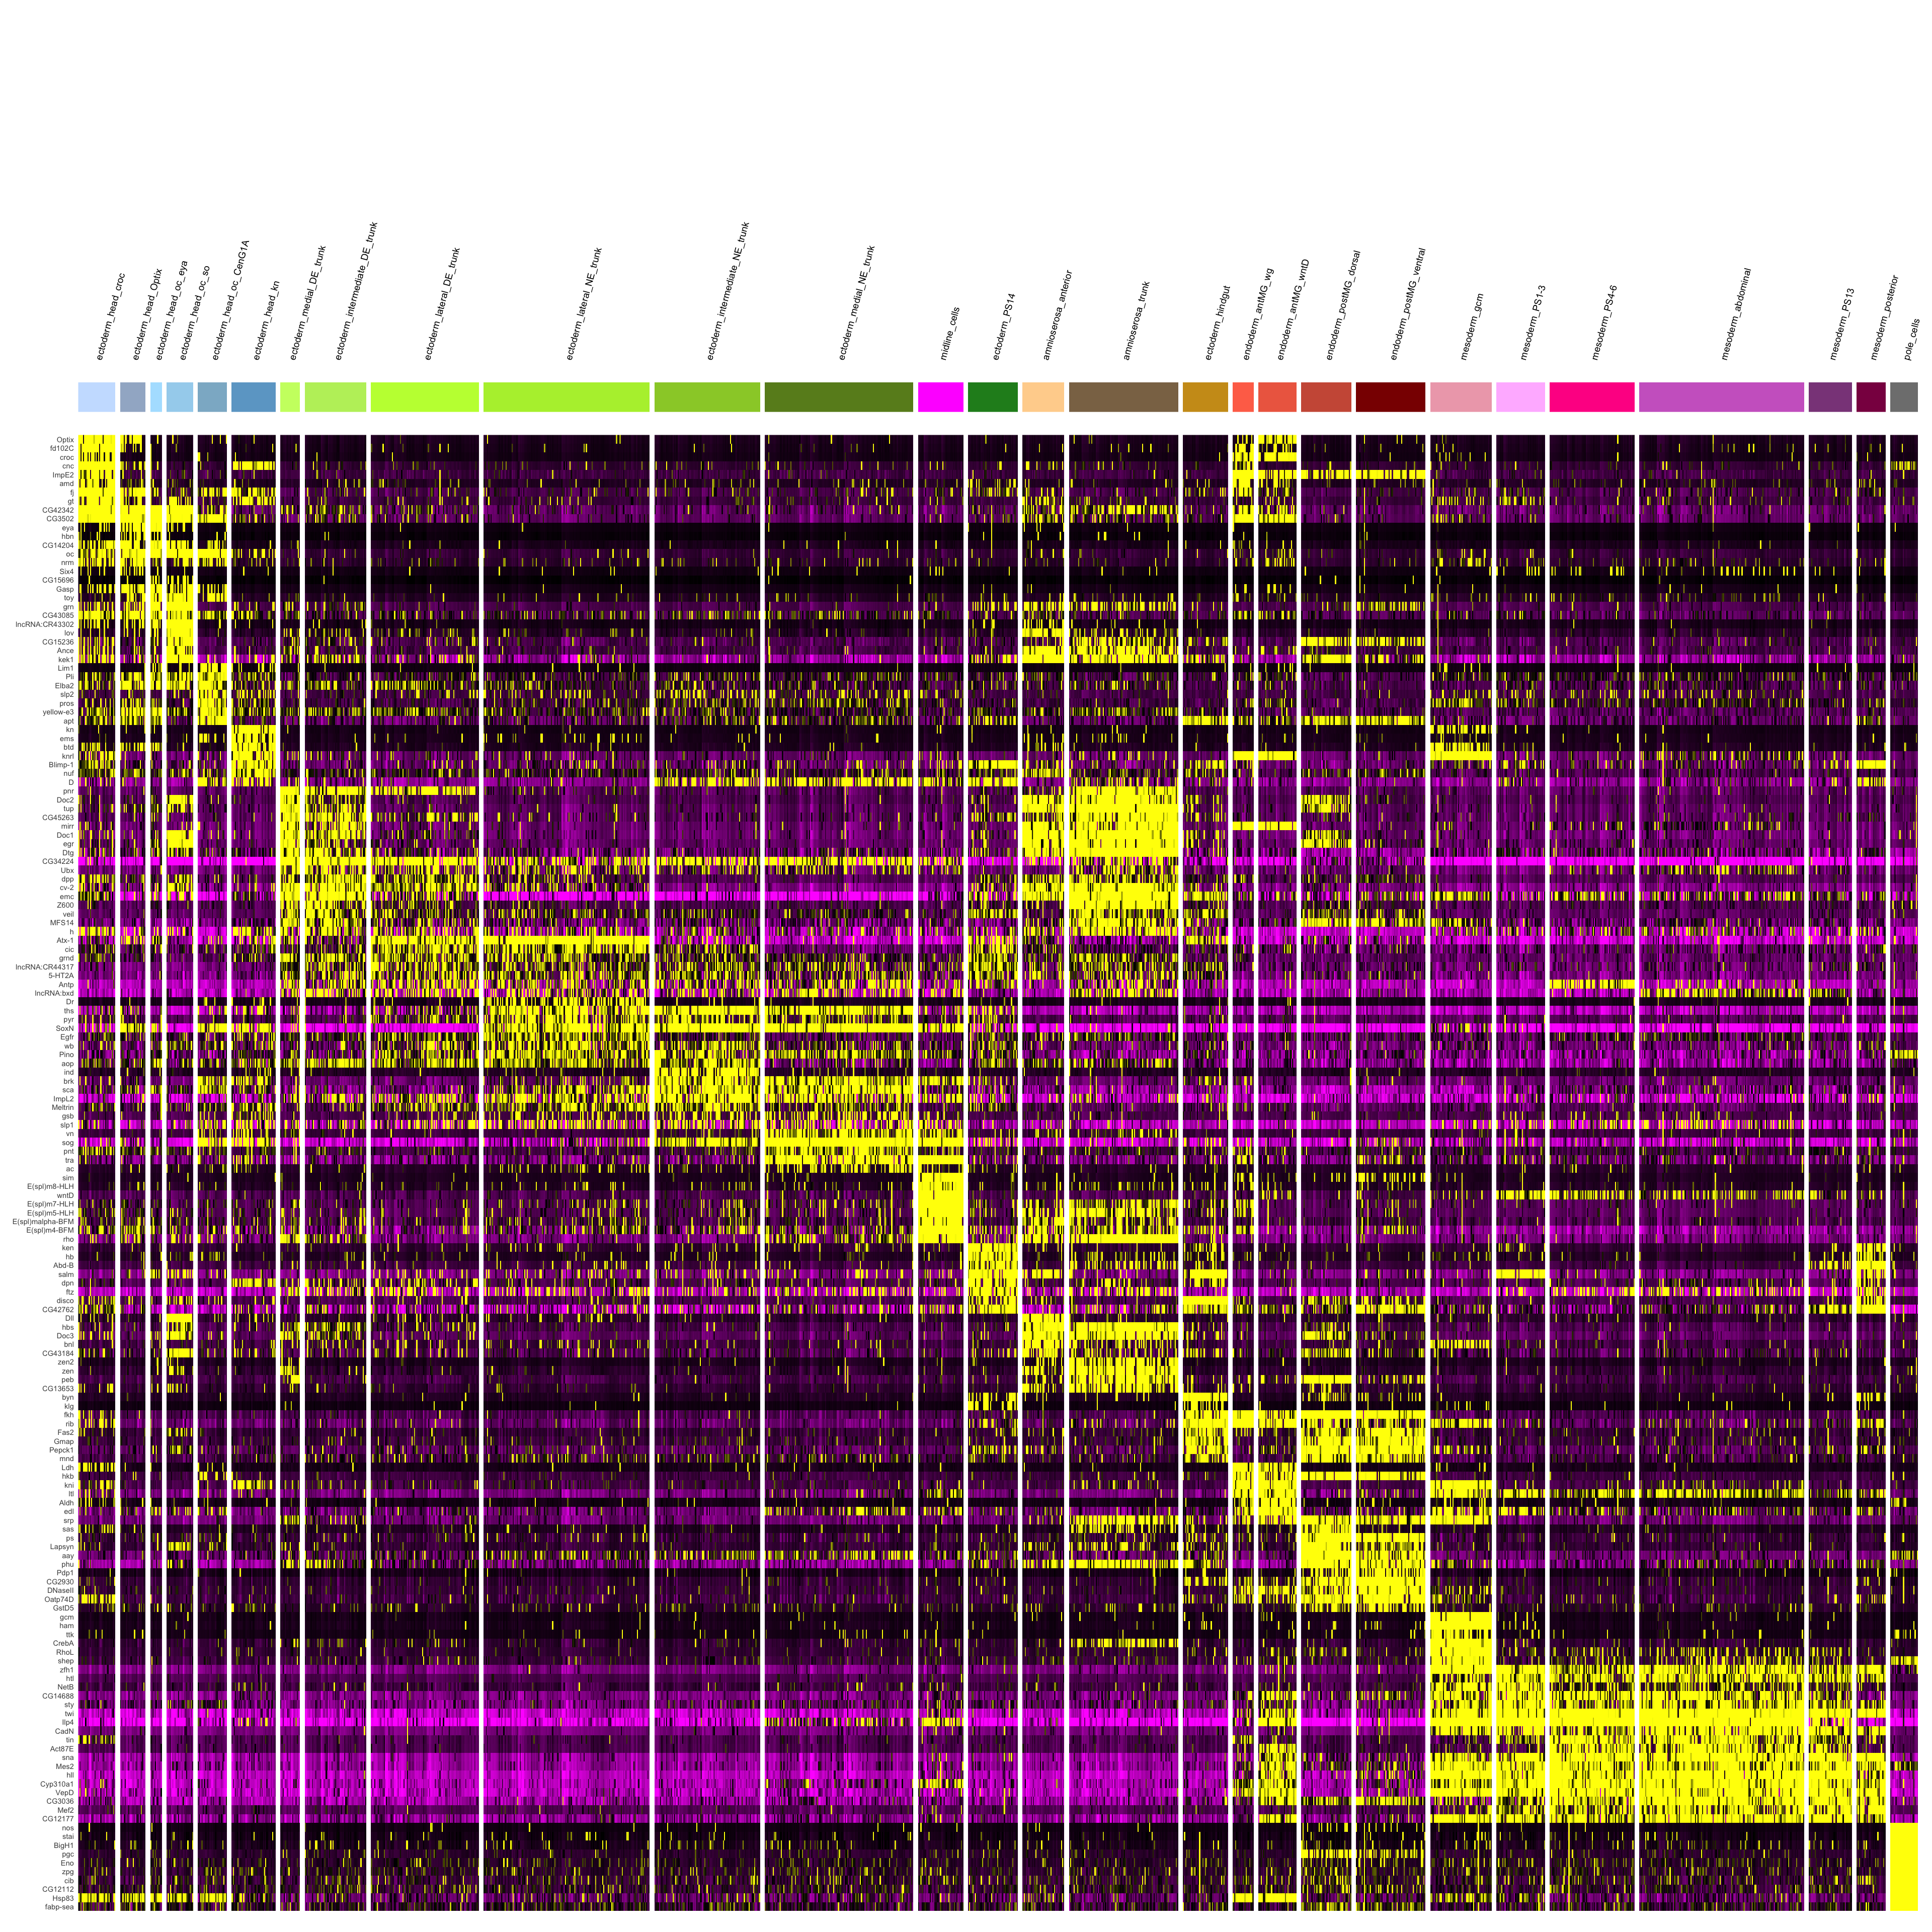

In [7]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)  + NoLegend() 
ggsave(file = "./figures/07_FindAllMarkers_NK/All_cells_heatmap_manual_ID_NK.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

NULL

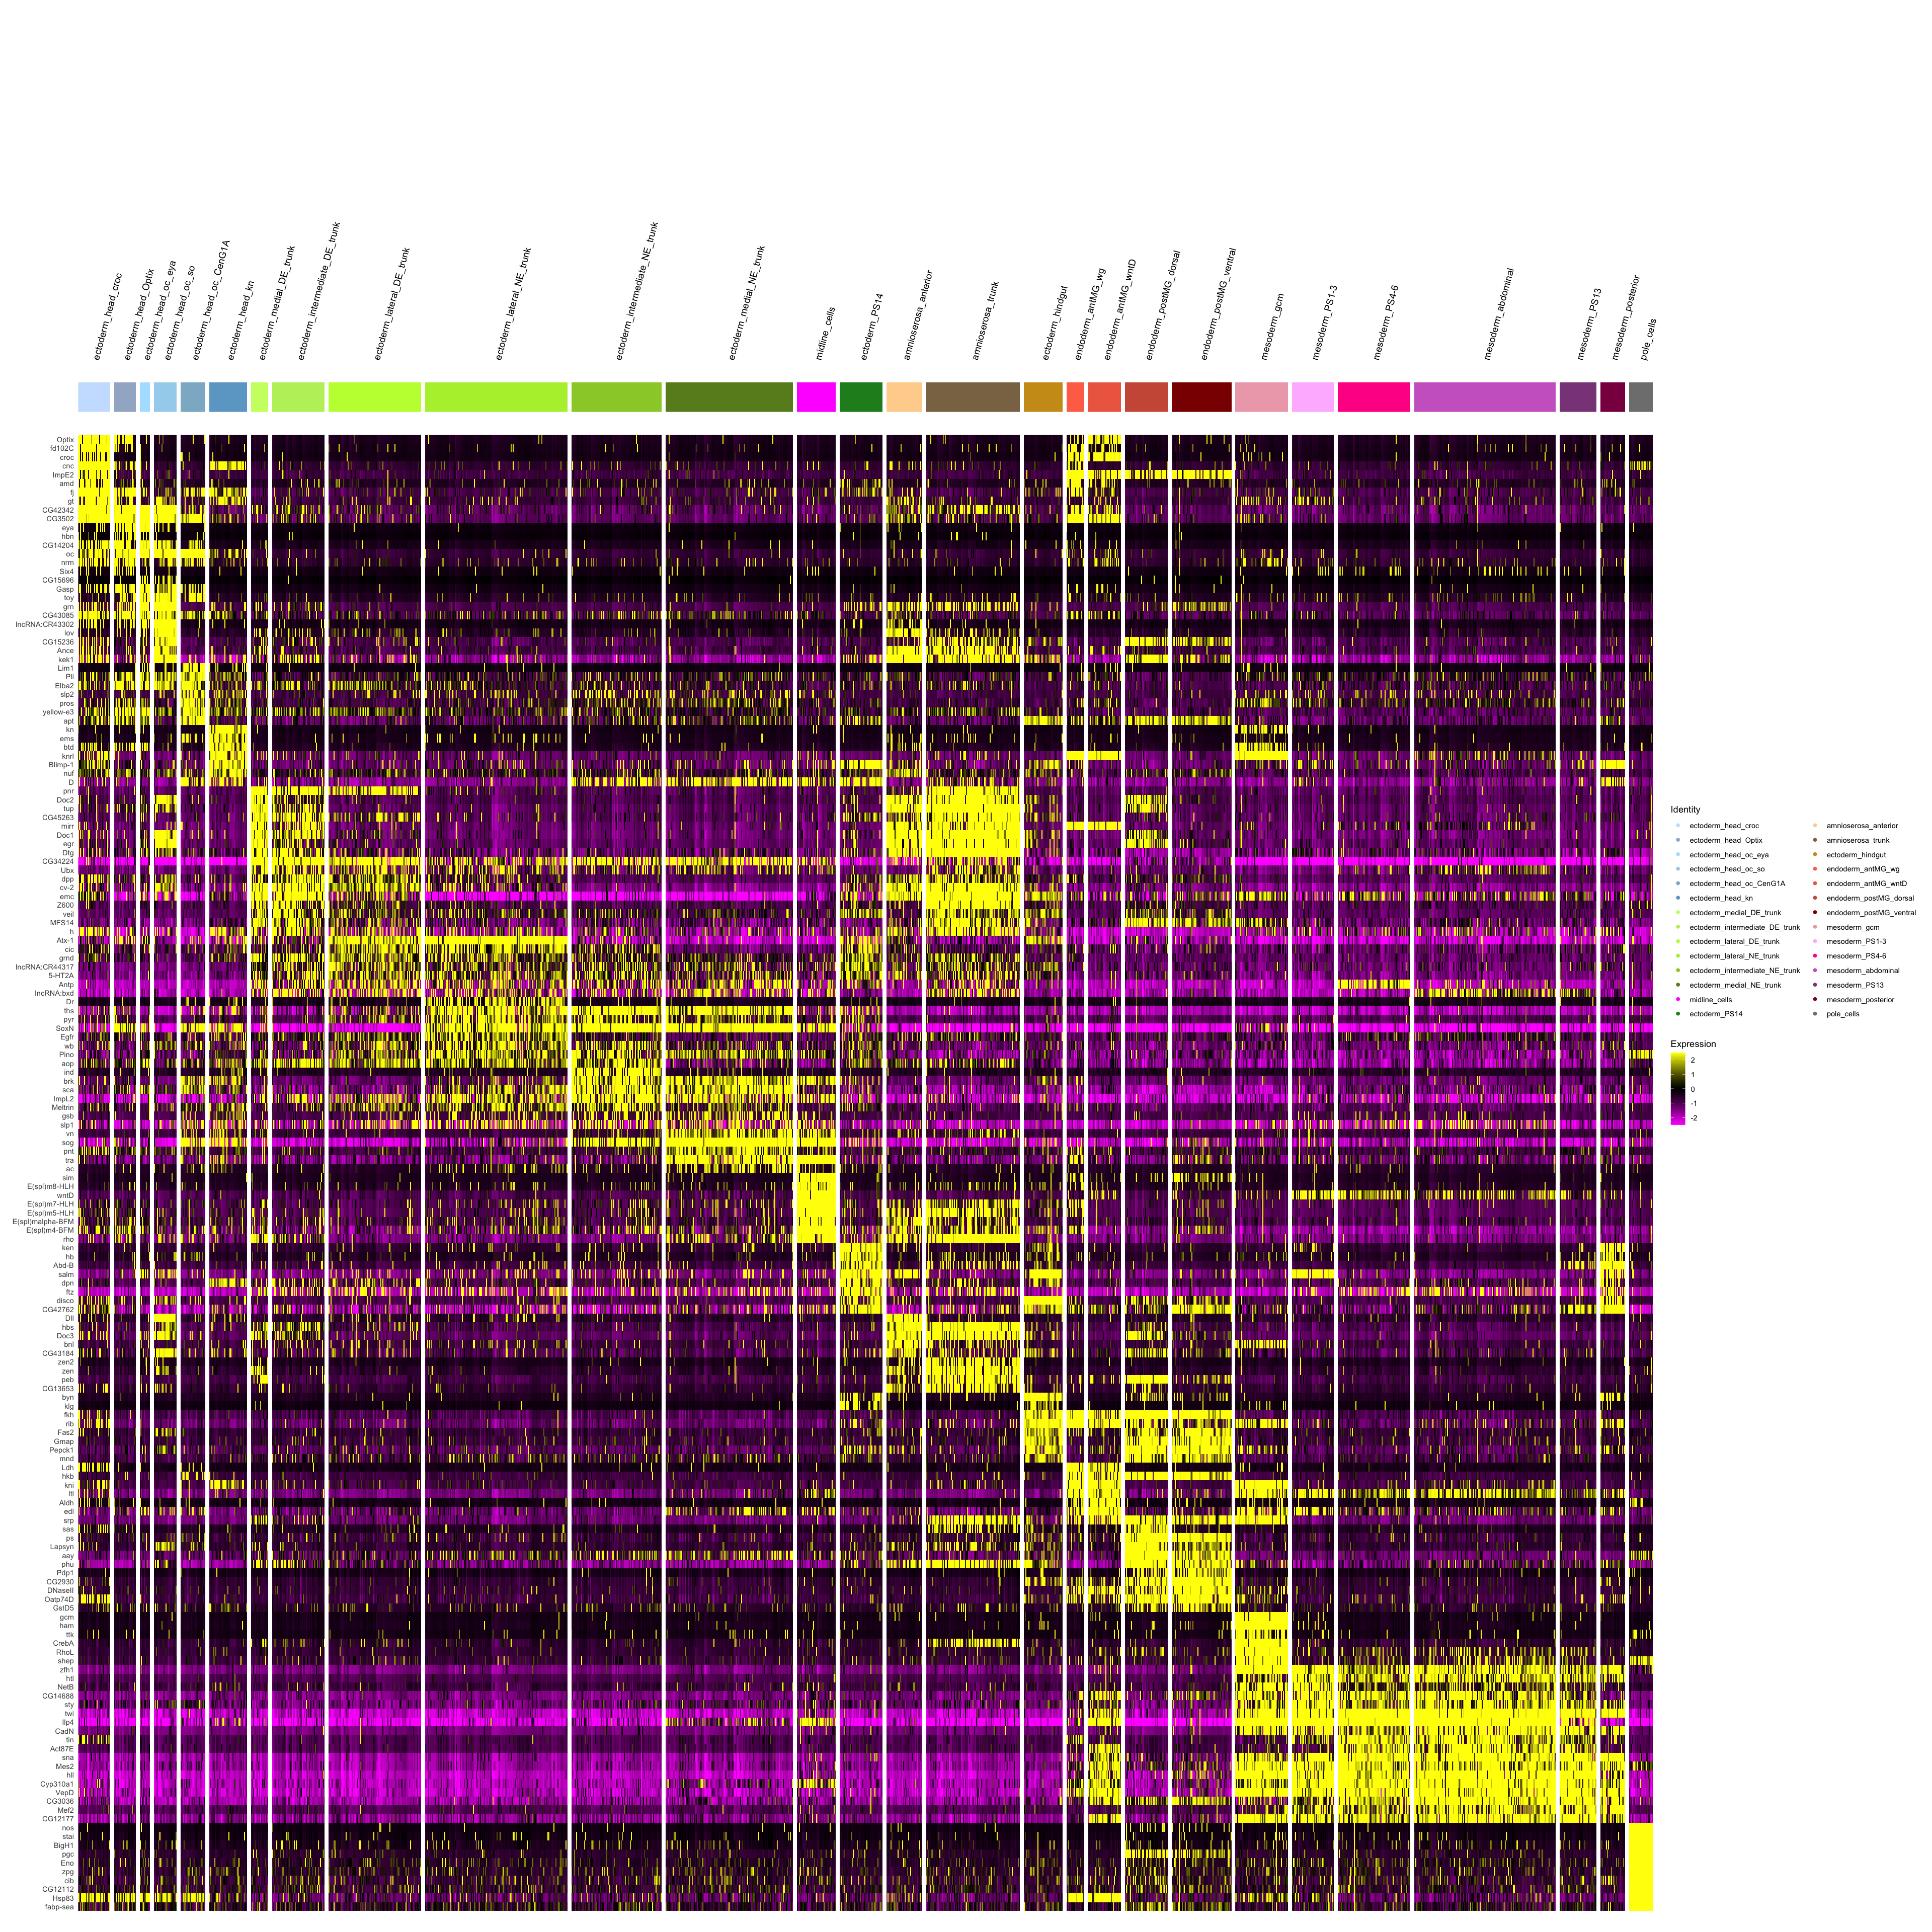

In [8]:
options(repr.plot.width=32, repr.plot.height=32)
DoHeatmap(seu_HQC, features = c(all.markers.top10$gene), group.colors = colors,
          angle = 75, size=4)
ggsave(file = "./figures/07_FindAllMarkers_NK/All_cells_heatmap_manual_ID_with_legend_NK.eps", width = 32, height = 32) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))

In [17]:
manual_ID <- all.markers$cluster
unique.manual_ID <- annot_df$cluster_name
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
all.markers$cluster_num <- manual_ID_num

In [18]:
write.csv(x = all.markers, file = './all_markers_NK.csv')

In [19]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          tibble_3.0.5               
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] data.table_1.13.6           magrittr_2.0.1